<a href="https://colab.research.google.com/github/eaedk/titanic/blob/main/ML_with_Python_on_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://cdn.shopify.com/s/files/1/0616/1606/2711/products/product-image-831446541_1024x1024_d944d4e8-7ca6-4cbc-b7d7-23549e9d6b79_1024x1024.jpg?v=1639755401" alt="drawing" width="300"/></center>





### Bonjour! 👋
<p style="font-size:16px;">Il s'agit d'un didacticiel adapté aux débutants qui couvre de nombreux sujets d'apprentissage automatique avec des explications utilisant l'ensemble de données Titanic. J'espère que vous apprécierez de parcourir le noutbook. Ci-dessous, vous pouvez voir ce que nous allons couvrir.<p>
    

In [ ]:
!pip -q install gdown

In [ ]:
# Dataset : https://drive.google.com/file/d/1d0WVixkx_FQ3TCVglgsSi5GlxoBvXCDG/
file_id = '1d0WVixkx_FQ3TCVglgsSi5GlxoBvXCDG' # filename: titanic.zip
!gdown --id $file_id 

!unzip -oq titanic.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1d0WVixkx_FQ3TCVglgsSi5GlxoBvXCDG
To: /content/titanic.zip
100% 34.9k/34.9k [00:00<00:00, 27.2MB/s]


## Menu:
<p style="font-size:16px;"> <a href="#anchor-name">1. Exploratory data analysis</a><br>
<a href="#anchor-name2">2. Feature Engineering & Cleaning </a><br>
<a href="#anchor-name3">3. k-Nearest Neighbors </a><br>
<a href="#anchor-name4">4. LogisticRegression </a><br>
<a href="#anchor-name5">5. SVC - Support Vector Classifier </a><br>
<a href="#anchor-name6">6. Ensemble Learning Methods </a><br>
<a href="#anchor-name7">7. Summary </a><br>
</p>


# <a id="anchor-name">Exploratory data analysis:</a>

In [ ]:
#Ici, nous importons les bibliothèques requises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#### Habituellement, nous devrions toujours avoir une idée du type de données avec lesquelles nous travaillons, c'est donc une bonne habitude de parcourir certaines lignes de données et de vérifier les colonnes depuis le début. Vous aurez une idée des données. Voici quelques définitions de colonne:
<p style="font-size:14px;">
Survived - Statut de survie (0 = Non ; 1 = Oui) <br>
Pclass   - Classe du passager (1 = 1er ; 2 = 2e ; 3 = 3e)<br>
SibSp    - Nombre de frères et sœurs/conjoints à bord<br>
Parch    - Nombre de parents/enfants à bord<br>
Ticket   - Numéro de billet<br>
Fare     - Tarif du billet<br>
Cabin    - Cabine du passager<br>
Cmbarked - Port d'Embarquation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
</p>


In [ ]:
#Chargez les données d'entraînement et afficher les 3 premières lignes
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#Pour sauvegarer les predictions finales
passenger_id = test_df['PassengerId']

#Affichage des 3 premières lignes des données d'entraînement 
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
#Informations générale sur les données d'entraînement
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Ici, nous trouvons les colonne qui comportent des valeurs manquantes :
dirty_col_train, dirty_col_test = train_df.columns[train_df.isnull().any()], test_df.columns[test_df.isnull().any()]
print("Colonnes avec des valeurs manquantes dans les données d'entraînement : {}\nColonnes avec des manquantes dans les données de test :{}".format(list(dirty_col_train),list(dirty_col_test)))

Colonnes avec des valeurs manquantes dans les données d'entraînement : ['Age', 'Cabin', 'Embarked']
Colonnes avec des manquantes dans les données de test :['Age', 'Fare', 'Cabin']


In [ ]:
# Combien de % de chaque colonne manque dans les données d'entraînement
train_df[dirty_col_train].isna().sum().sort_values(ascending=False)/train_df.shape[0] * 100

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

In [ ]:
# Combien de % de chaque colonne manque dans les données de test
test_df[dirty_col_test].isna().sum().sort_values(ascending=False)/test_df.shape[0] * 100

Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64

<p style="font-size:16px;"> 
D'après ce qui précède, il est clair qu'il manque des valeurs dans les colonnes : <b>Cabine </b>, <b>Âge </b>, <b>Tarif </b> et <b>Embarqué </b>. Ne vous inquiétez pas, nous nous en occuperons dans la section d'ingénierie des fonctionnalités. D'AILLEURS,
nous pouvons également utiliser seaborn pour créer une carte thermique afin de voir visuellement ces valeurs manquantes :
</p>

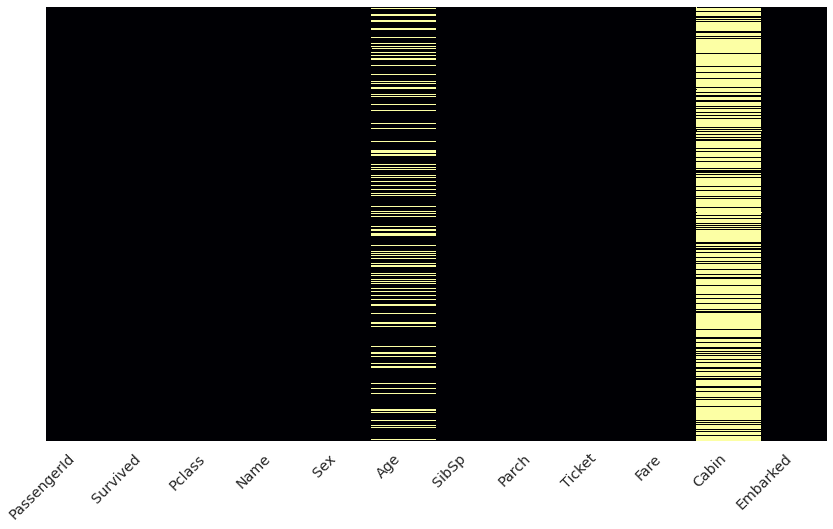

In [ ]:
sns.set_style('whitegrid',{'axes.grid' : False})
#représentation pour les données manquantes de l'ensemble d'entraînement
plt.figure(figsize=(14,8))
sns.set(font_scale=1.3)
g = sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='inferno')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

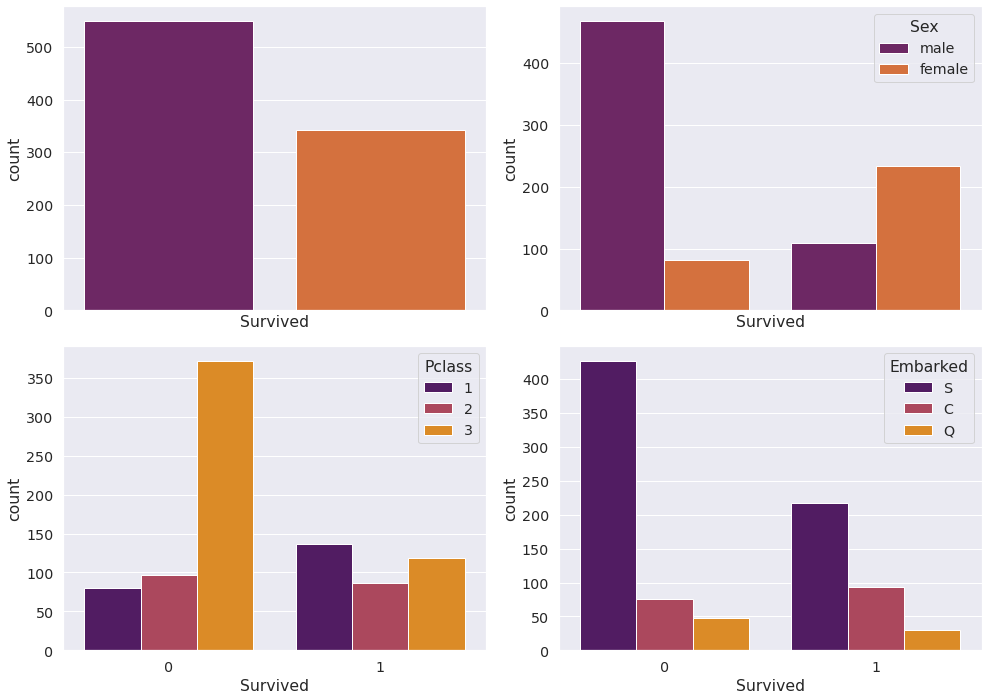

In [ ]:
#Analyse de survie par différentes métriques
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(14,10), sharex=True)
sns.countplot(x='Survived',data=train_df,palette='inferno',ax=axs[0,0])
sns.countplot(x='Survived',hue='Sex',data=train_df,palette='inferno',ax=axs[0,1])
sns.countplot(x='Survived',hue='Pclass',data=train_df,palette='inferno',ax=axs[1,0])
sns.countplot(x='Survived',hue='Embarked',data=train_df,palette='inferno',ax=axs[1,1])
fig.tight_layout()
plt.show()

<p style="font-size:16px;"> 
Le premier chiffre nous montre que la plupart des gens n'ont pas pu survivre à la catastrophe. D'après d'autres parcelles, nous voyons que le taux de survie était très élevé pour les femmes alors que c'était tout le contraire pour les hommes du tableau. En plus de cela, la plupart de ceux qui sont morts étaient des passagers de 3e classe. N'hésitez pas à partager plus d'informations à partir des graphiques ci-dessous dans les commentaires !
</p>

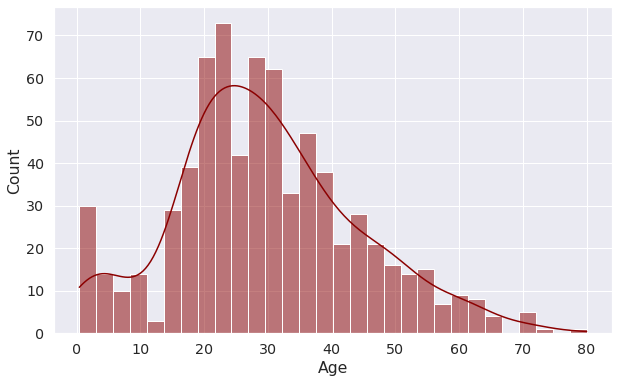

In [ ]:
#Histogramme des âges des passagers.
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(),bins=30, palette='inferno', color='darkred', alpha=0.5, kde=True)

<p style="font-size:16px;"> 
Nous voyons que la plupart des passagers avaient entre 20 et 30 ans.
</p>

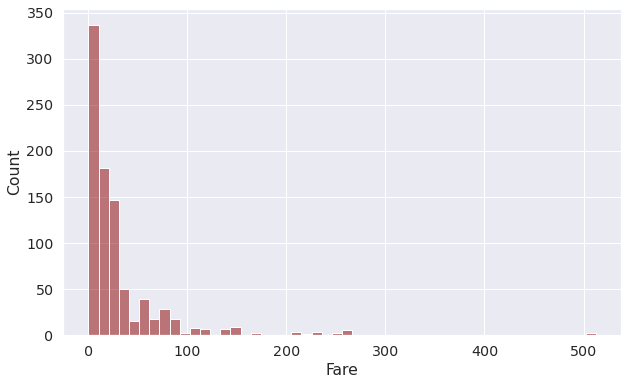

In [ ]:
#Histogramme du prix du billet des passagers.
plt.figure(figsize=(10,6))
sns.histplot(train_df['Fare'],bins=50, palette='inferno', color='darkred', alpha=0.5)

<p style="font-size:16px;"> 
La plupart des gens ont payé moins de 50 &dollar; pour leurs billets, étonnamment, il y a des cas particuliers comme celui qui a payé plus de 500 &dollar; . Voyons qui est cette personne et vérifions si elle a survécu !
</p>

In [ ]:
max_fare = train_df['Fare'].max()
train_df[train_df['Fare']==max_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<p style="font-size:16px;">Umm, ils ont tous survécu. La partie la plus intéressante est que les premiers et derniers passagers étaient les serviteurs de <a href="https://titanic.fandom.com/wiki/Thomas_Drake_Martinez_Cardeza">Thomas Drake Martinez Cardeza</a> qui était un riche banquier. Quelque chose cloche ici. Bon, passons à autre chose.<p>

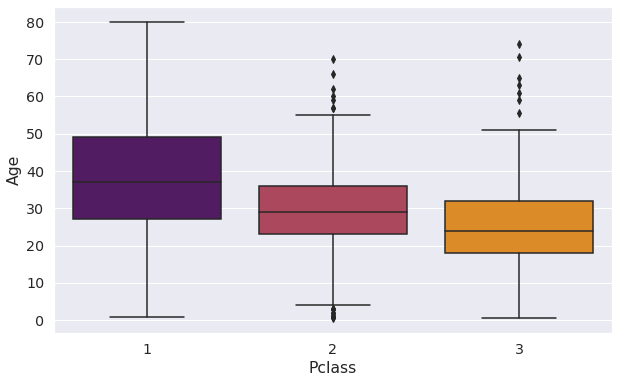

In [ ]:
#Boîte à moustaches de la classe de passagers par rapport à l'âge des passagers
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='inferno')

<p style="font-size:16px;"> C'est logique, plus la personne est âgée, plus elle a tendance à avoir d'argent. Ainsi, l'âge moyen des passagers de 1ère classe était le plus élevé.<br> Vous pouvez littéralement proposer différents types de visualisation pour mieux comprendre les données, ici nous nous arrêtons et commençons l'ingénierie des fonctionnalités.<p>

# <a id="anchor-name2">Feature Engineering & Cleaning:</a>

<p style="font-size:16px;">L'ingénierie des fonctionnalités consiste généralement à proposer des fonctionnalités plus efficaces compte tenu de l'ensemble de données. Nous allons parcourir les colonnes une par une: PassengerId, Survived, Pclass won't be changed. Considérant les colonnes Name,Sex, Ticket, and Embarked, nous devrions transformer les mots/lettres en valeurs numériques. Nous ne faisons rien à la colonne Cabin car nous ne l'utilisons pas en raison du pourcentage élevé de valeurs manquantes<p>

In [ ]:
#Ici, nous allons fusionner train_df et test_df puisque les étapes de nettoyage et d'ingénierie des fonctionnalités sont les mêmes.
# Mais faisons cette astuce pour pouvoir les séparer à la fin :
test_df['Survived'] = -1
# Concaténer maintenant Train et Test le long des lignes
df = pd.concat([test_df, train_df], axis=0)

In [ ]:
#Nous allons introduire une nouvelle fonctionnalité : Name_length
df['Name_length'] = df['Name'].apply(len)

#Nous allons introduire une nouvelle fonctionnalité : Titre
df['Title']=df.Name.str.extract('([A-Za-z]+)\.') 

#Voir tous les titres de l'ensemble d'entraînement
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Sir           1
Countess      1
Capt          1
Don           1
Lady          1
Mme           1
Dona          1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
#Minimiser les classes de titre
df['Title'] = df['Title'].replace(['Dr', 'Rev','Major', 'Col','Countess', 'Capt', 'Sir', 'Lady', 'Sir', 'Don','Dona', 'Jonkheer'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms','Mme'], ['Miss','Miss','Mrs'])

#Nous pouvons fusionner SibSp et Parch dans une colonne numérique appelée Family_size
df['Family_size'] = df['SibSp'] + df['Parch'] + 1 #Y compris le passager lui-même

#Laissons tomber les colonnes que nous n'utilisons pas.
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch', 'SibSp']
df.drop(drop_cols, axis = 1, inplace=True)

#Il y a des valeurs manquantes dans la colonne Age, nous allons les travailler :

#Calculons l'âge moyen en fonction de la colonne Pclass
age_by_class = df.groupby(['Pclass'])[['Age']].mean().to_dict()['Age']

#La fonction que nous utilisons pour imputer l'âge moyen aux valeurs manquantes selon la colonne Pclass :
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return age_by_class[Pclass]
    else:
        return Age
    
#Imputing the values using apply :
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

#Imputing the values using apply:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

#Supprimez les lignes avec une valeur manquante dans la colonne 'Embarked'
df1 = df.dropna(subset=['Embarked'])

# Travaillons sur des valeurs catégorielles, et transformons-les en one-hot-encoding , valeurs numériques : Pclass, Sex, Embarked, Title
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'Title'], drop_first=True)

In [ ]:
#C'est une bonne pratique de normaliser les colonnes numériques :
scaler = StandardScaler()
df[['Age', 'Fare', 'Family_size', 'Name_length']] = scaler.fit_transform(df[['Age', 'Fare', 'Family_size', 'Name_length']])

In [ ]:
df.head()

,Age,Fare,Survived,Name_length,Family_size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0.392581,-0.492093,-1,-1.171292,-0.558346,0,1,1,1,0,0,1,0,0
1,1.345120,-0.508125,-1,0.512410,0.073352,0,1,0,0,1,0,0,1,0
2,2.488165,-0.456164,-1,-0.224210,-0.558346,1,0,1,1,0,0,1,0,0
3,-0.178941,-0.475981,-1,-1.171292,-0.558346,0,1,1,0,1,0,1,0,0
4,-0.559957,-0.405895,-1,1.775186,0.705051,0,1,0,0,1,0,0,1,0


In [ ]:
# Maintenant, nous pouvons les séparer comme nous les avons fusionnés auparavant
train_df = df[df["Survived"]!=-1].copy()
test_df = df[df["Survived"]==-1].copy()

In [ ]:
# Eliminons la colonne 'Survived' du test set:
test_df.drop("Survived", axis = 1, inplace=True)

# <a id="anchor-name3">k-Nearest Neighbors:</a>

<p style="font-size:16px;">Le k-plus proches voisins (KNN) est un simple algorithme d'apprentissage automatique supervisé qui peut être utilisé pour résoudre à la fois des problèmes de classification et de régression.</p>
<center><img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png" alt="drawing" width="300"/></center>
<p style="font-size:16px;">En termes simples, nous regardons simplement les N voisins les plus proches et découvrons la classe majoritaire parmi eux. Comme vous pouvez le voir, si K = 3, les nouvelles données seront affectées à la classe B, mais si k = 7, elles deviendront la classe A. <br>
     Lorsque k <b>augmente</b>, la complexité du modèle diminue, <b>sous-apprend</b> les données.<br>
Lorsque k <b>diminue</b>, la complexité du modèle augmente, <b>sur-apprend</b> les données.<br>
</p>

In [ ]:
#Créons un dictionnaire pour toutes les précisions de modèle dans le bloc-notes :
model_accuracy = dict()
#Train test split
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

Nous avons découpé notre ensemble d'entrainement de sorte à obtenir un 3 jeux de données: 'entrainement', 'validation', et 'test'.

L'illustration ci-dessous, vous permettra de mieux visualiser.

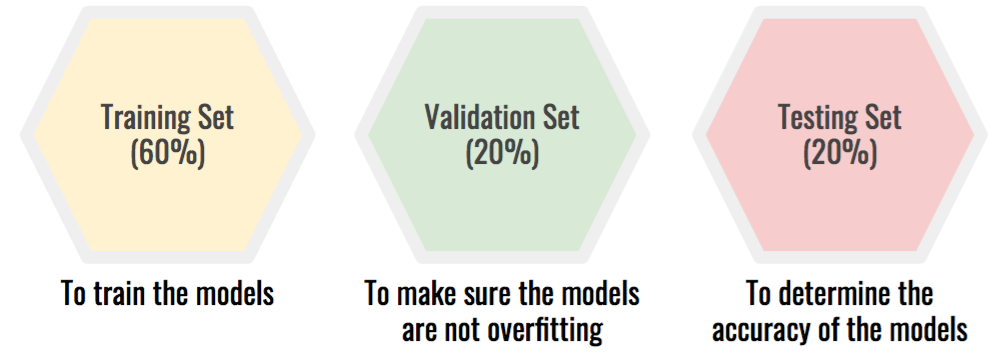

In [ ]:
# KNN Classification
# Choisissons le k le plus optimal
neighbors = np.arange(1, 50)
train_acc = {}
val_acc = {}

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_acc[neighbor] = knn.score(X_train, y_train)
    val_acc[neighbor] = knn.score(X_val, y_val)
    
model_accuracy['KNN'] = max(val_acc.values())
print("The best accuracy: {} when k={}".format(max(val_acc.values()),max(val_acc, key=val_acc.get)))

The best accuracy: 0.8268156424581006 when k=27


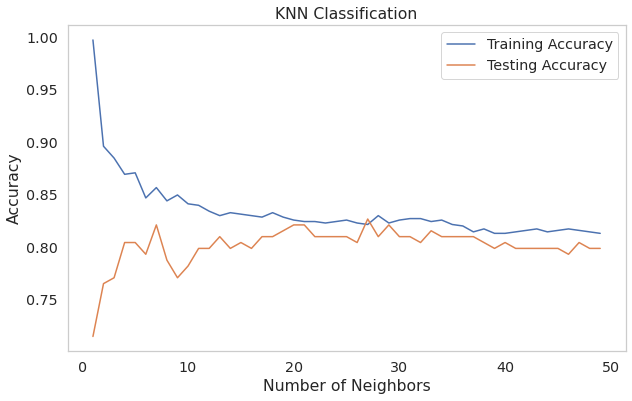

In [ ]:
# We can see the plot here below
sns.set_style('whitegrid',{'axes.grid' : False})
# Add a title
plt.figure(figsize=(10,6))
plt.title("KNN Classification")

# Plot training accuracies
plt.plot(neighbors, list(train_acc.values()), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, list(val_acc.values()), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

<p style="font-size:16px;">Les k-plus proches voisins (KNN) ont bien fonctionné, nous avons eu la meilleure précision lorsque k=27, super , mais pourquoi s'arrêter ici. Partons à l'aventure à travers d'autres algorithmes à la recherche de la meilleure précision !</p>

# <a id="anchor-name4">Logistic Regression:</a>
<p style="font-size:16px;">La régression logistique modélise les probabilités de problèmes de classification avec deux résultats possibles. C'est une extension du modèle de régression linéaire pour les problèmes de classification. Essayez <a href="https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer">Cette</a> vidéo amusante de StatQuests pour plus d'informations.</p>

In [ ]:
# Set up a LogisticRegression Classifier
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit the model
lr.fit(X_train, y_train)

# Compute accuracy
print(lr.score(X_val, y_val))
print(lr.score(X_train, y_train))


0.8156424581005587
0.8286516853932584


<p style="font-size:16px;">Essayons de jouer avec ses hyperparamètres, il semble que nous pouvons tirer un peu plus de cet attaboy sous-ajusté. Contrairement au cas dans KNN, nous utiliserons une meilleure méthode appelée 'GridSearchCV'. Il essaie simplement différentes valeurs de paramètres et trouve la meilleure estimation pour nous, il peut également effectuer une CrossValidation en même temps. Merveilleux, hein !</p>

In [ ]:
# Set up a LogisticRegression Classifier:
linear_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

# Showing the parameters and initiliazing the GridSearch5-FoldCv:
parameters = {'C':[1, 10, 100, 1000, 10000]}
searcher = GridSearchCV(linear_classifier, parameters, cv=5)
searcher.fit(X_train, y_train)

best_acc = searcher.score(X_val, y_val)
#Adding the best score to the final dict
model_accuracy['Logistic Regression'] = searcher.score(X_val, y_val)

# Reporting the best values:
print("The best accuracy: {} when C={}".format(best_acc,searcher.best_params_['C']))

#list of prediction probabilities for ROC curve
y_pred_probs = searcher.predict_proba(X_val)[:, 1]
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#  Added later
model_final_eval =  searcher.best_estimator_

The best accuracy: 0.8491620111731844 when C=100


<p style="font-size:20px;">Voila! We have <b>85%</b> d'accuracy après avoir bidouillé le modèle.</p>

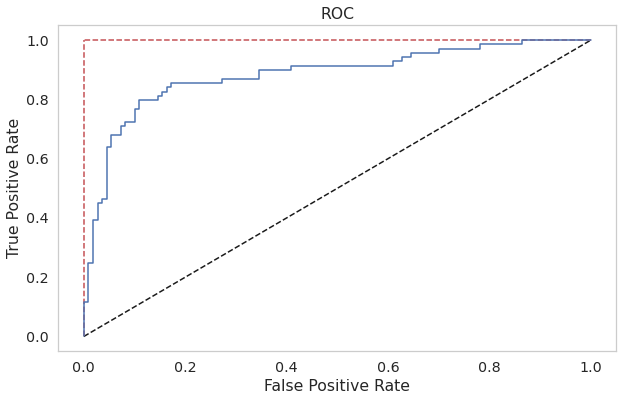

In [ ]:
# The ROC Curve is mostly used along confusion matrix when working with classification problems
# The closer the figure to the left corner , or the more the areas under the curver, the better it is:
plt.figure(figsize=(10,6))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

plt.plot([0, 0], [0, 1], 'r--')
plt.plot([1, 0], [1, 1], 'r--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# <a id="anchor-name5">SVC - Support Vector Classifier</a>
<p style="font-size:16px;">Support Vector Machine (SVM) est un algorithme d'apprentissage automatique supervisé qui peut être utilisé à la fois pour des problèmes de classification ou de régression. Une machine à vecteurs de support (SVM) est un algorithme d'apprentissage automatique supervisé qui résout des problèmes de classification à deux groupes.<a href="https://www.youtube.com/watch?v=efR1C6CvhmE&ab_channel=StatQuestwithJoshStarmer">Cette</a> vidéo musicale par StatQuests vient à la rescousse pour plus d'infos.</p>

In [ ]:
#Since we got really goot at training data, let's start right from here:
# Instantiate an SVM
svm = SVC()

# Showing the parameters and initiliazing the GridSearch5-FoldCv:
parameters = {'C':[0.1, 1, 10, 20,30], 'gamma':[0.01, 0.03, 0.1, 0.3, 1]}
searcher = GridSearchCV(svm, parameters, cv=5)
searcher.fit(X_train, y_train)

best_acc = searcher.score(X_val, y_val)
#Adding the best score to the final dict
model_accuracy['SVC'] = searcher.score(X_val, y_val)

# Reporting the best values:
print("The best accuracy: {} when {}".format(best_acc,searcher.best_params_))


The best accuracy: 0.8044692737430168 when {'C': 20, 'gamma': 0.1}


<p style="font-size:20px;">Voila! Nous avons une précision de <b>80 %</b>, et le SVC est nul ! Quoi qu'il en soit, commençons maintenant les méthodes d'ensemble !</p>

# <a id="anchor-name6">Ensemble Methods</a>
<p style="font-size:16px;">Il existe de nombreuses méthodes d'apprentissage d'ensemble pour les problèmes de classification. L'apprentissage d'ensemble est une méta-approche générale de l'apprentissage automatique qui recherche de meilleures performances prédictives en combinant les prédictions de différents modèles mis ensemble.</p>

## Classification and Regression Tree (CART):


In [ ]:
# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Showing the parameters and initiliazing the GridSearch5-FoldCv:
parameters = {'max_depth':list(range(1,15))}
searcher = GridSearchCV(dt, parameters, cv=5)
searcher.fit(X_train, y_train)

best_acc = searcher.score(X_val, y_val)
#Adding the best score to the final dict
model_accuracy['Decision Tree'] = searcher.score(X_val, y_val)

# Reporting the best values:
print("The best accuracy: {} when {}".format(best_acc,searcher.best_params_))

The best accuracy: 0.8324022346368715 when {'max_depth': 3}


## <a id="anchor-name5">Voting Classifier:</a>

In [ ]:
# Instantiate lr
lr = LogisticRegression(C=100)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=29)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=3)

#Intd svc
svc = SVC(C=30, gamma=0.1)

# List of Classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt), ('SVC', svc)]

# Instantiate a VotingClassifier
vc = VotingClassifier(estimators=classifiers)
# Fit vc to the training set
vc.fit(X_train, y_train)   

y_pred = vc.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
model_accuracy['Voting Classifier'] = accuracy
print('The accuracy: {:.2f}'.format(accuracy))

The accuracy: 0.85


## Random Forest Classifier

In [ ]:
# Instantiate the RandomForestClassifier
rf = RandomForestClassifier()

# Showing the parameters and initiliazing the GridSearch5-FoldCv:
params_rf = {'n_estimators':[100,200,300,400,500],
            'max_features':['log2','auto','sqrt'],
            'min_samples_leaf':[1,2,4,16,32,64]}

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=5,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

best_acc = grid_rf.score(X_val, y_val)

#Adding the best score to the final dict
model_accuracy['Random Forest Classifier'] = grid_rf.score(X_val, y_val)

# Reporting the best values:
print("The best accuracy: {} when {}".format(best_acc,grid_rf.best_params_))

The best accuracy: 0.8156424581005587 when {'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 500}


## <a id="anchor-name5">Bagging Classifier:</a>

In [ ]:
# Instantiate DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1,max_depth=3)

# Instantiate BaggingClassifier
bc = BaggingClassifier(base_estimator=dt, n_estimators=30, random_state=1)

# Fitting
bc.fit(X_train, y_train)

# Predicting
y_pred = bc.predict(X_val)

# Evaluate acc_val
acc_val = accuracy_score(y_val, y_pred)
model_accuracy['Bagging Classifier'] = acc_val
print('Val set accuracy: {}'.format(acc_val)) 

Val set accuracy: 0.8212290502793296


## <a id="anchor-name5">AdaBoost Classifier:</a>

In [ ]:
# Instantiate DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)

# Instantiate AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=20, random_state=42)
                      
# Fitting
ada.fit(X_train, y_train)
                         
# Predicting
y_pred = ada.predict(X_val)

# Evaluate acc_val
acc_val = accuracy_score(y_val, y_pred)
model_accuracy['AdaBoost Classifier'] = acc_val
print('Val set accuracy: {}'.format(acc_val)) 

Val set accuracy: 0.8156424581005587


## XGBoost Classifier

In [ ]:
# Showing the parameters and initiliazing the GridSearch5-FoldCv:
gb_param_grid = {
    'n_estimators': [10,20,30,40],
    'max_depth': list(range(7,14)),
    'objective':['binary:logistic']
}

# Instantiating the XGBClassifier
gb = xgb.XGBClassifier(seed=123)

grid = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=5)

grid.fit(X_train, y_train)

best_acc = grid.score(X_val, y_val)
#Adding the best score to the final dict
model_accuracy['XGBoost Classifier'] = best_acc

# Reporting the best values:
print("The best accuracy: {} when {}".format(best_acc,grid.best_params_))

The best accuracy: 0.8212290502793296 when {'max_depth': 7, 'n_estimators': 30, 'objective': 'binary:logistic'}


<p style="font-size:16px;">Toutes les méthodes d'ensemble ont bien fonctionné. Je pense que certains d'entre eux peuvent encore être améliorés en modifiant les hyperparamètres. Parmi eux, XGBoost a fait du très bon travail.</p>

# <a id="anchor-name7">Summary</a>

<p style="font-size:18px;">Dans ce cahier, nous avons pris l'ensemble de données brutes du Titanic et sommes passés par différentes étapes allant de l'exploration des données à l'évaluation du modèle. Nous avons formé 9 modèles, certains sont assez similaires les uns aux autres, à savoir les algorithmes d'apprentissage d'ensemble. Le meilleur score obtenu était de 85% par LogisticRegression, le suivant est XGBoost avec une précision de 84%.</p>

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
y = list(model_accuracy.values())
x = list(model_accuracy.keys())
data = [go.Bar(
            x= x,
            y= y,
            width = 0.5,
            marker=dict(
            color = list(model_accuracy.values()),
            colorscale='viridis',
            showscale=True,
            reversescale = False
            ),
            opacity=0.5
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplot of Different Classification Algorithms',
    yaxis=dict(
        title= 'Accuracy',
        ticklen= 5,
        gridwidth= 2
    )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},title_x=0.5)
py.iplot(fig, filename='bar-acc')

In [ ]:
# Final submission
predictions = grid.predict(test_df)
Submission = pd.DataFrame({ 'PassengerId': passenger_id,
                            'Survived': predictions })
Submission.to_csv("FinalSubmission.csv", index=False)